In [1]:
import sys, os, pickle
import numpy as np
from dsc.dsc_io import load_dsc as __load_dsc__, source_dirs as __source_dirs__

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

In [2]:
data = __load_dsc__(['/home/saikatbanerjee/scratch/work/gradvi-experiments/trendfiltering/changepoint/changepoint_52.pkl'])

In [3]:
data.keys()

dict_keys(['X', 'Xinv', 'y', 'ytest', 'ytrue', 'beta', 'snr', 'degree', 'DSC_DEBUG'])

In [4]:
X = data['X']
Xinv = data['Xinv']
degree = data['degree']
y = data['y']
ytrue = data['ytrue']

In [5]:
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.optimize import moving_average as gv_moving_average

prior_init = toy_priors.get_ash_scaled(k = 20, sparsity = 0.9, skbase = (degree + 1) * 20)
print(prior_init.sk)

y0 = gv_moving_average.moving_average(y)
binit = np.zeros_like(y0)
s2init = np.var(y - y0) / 10.0
print(s2init)

[ 0.          0.227178    0.50596585  0.84808817  1.26793316  1.78315768
  2.41542989  3.19134044  4.1435208   5.31201559  6.74596669  8.50567995
 10.66516135 13.31522943 16.56733468 20.55824672 25.45580619 31.46598344
 38.84154077 47.8926625 ]
0.000985019271954509


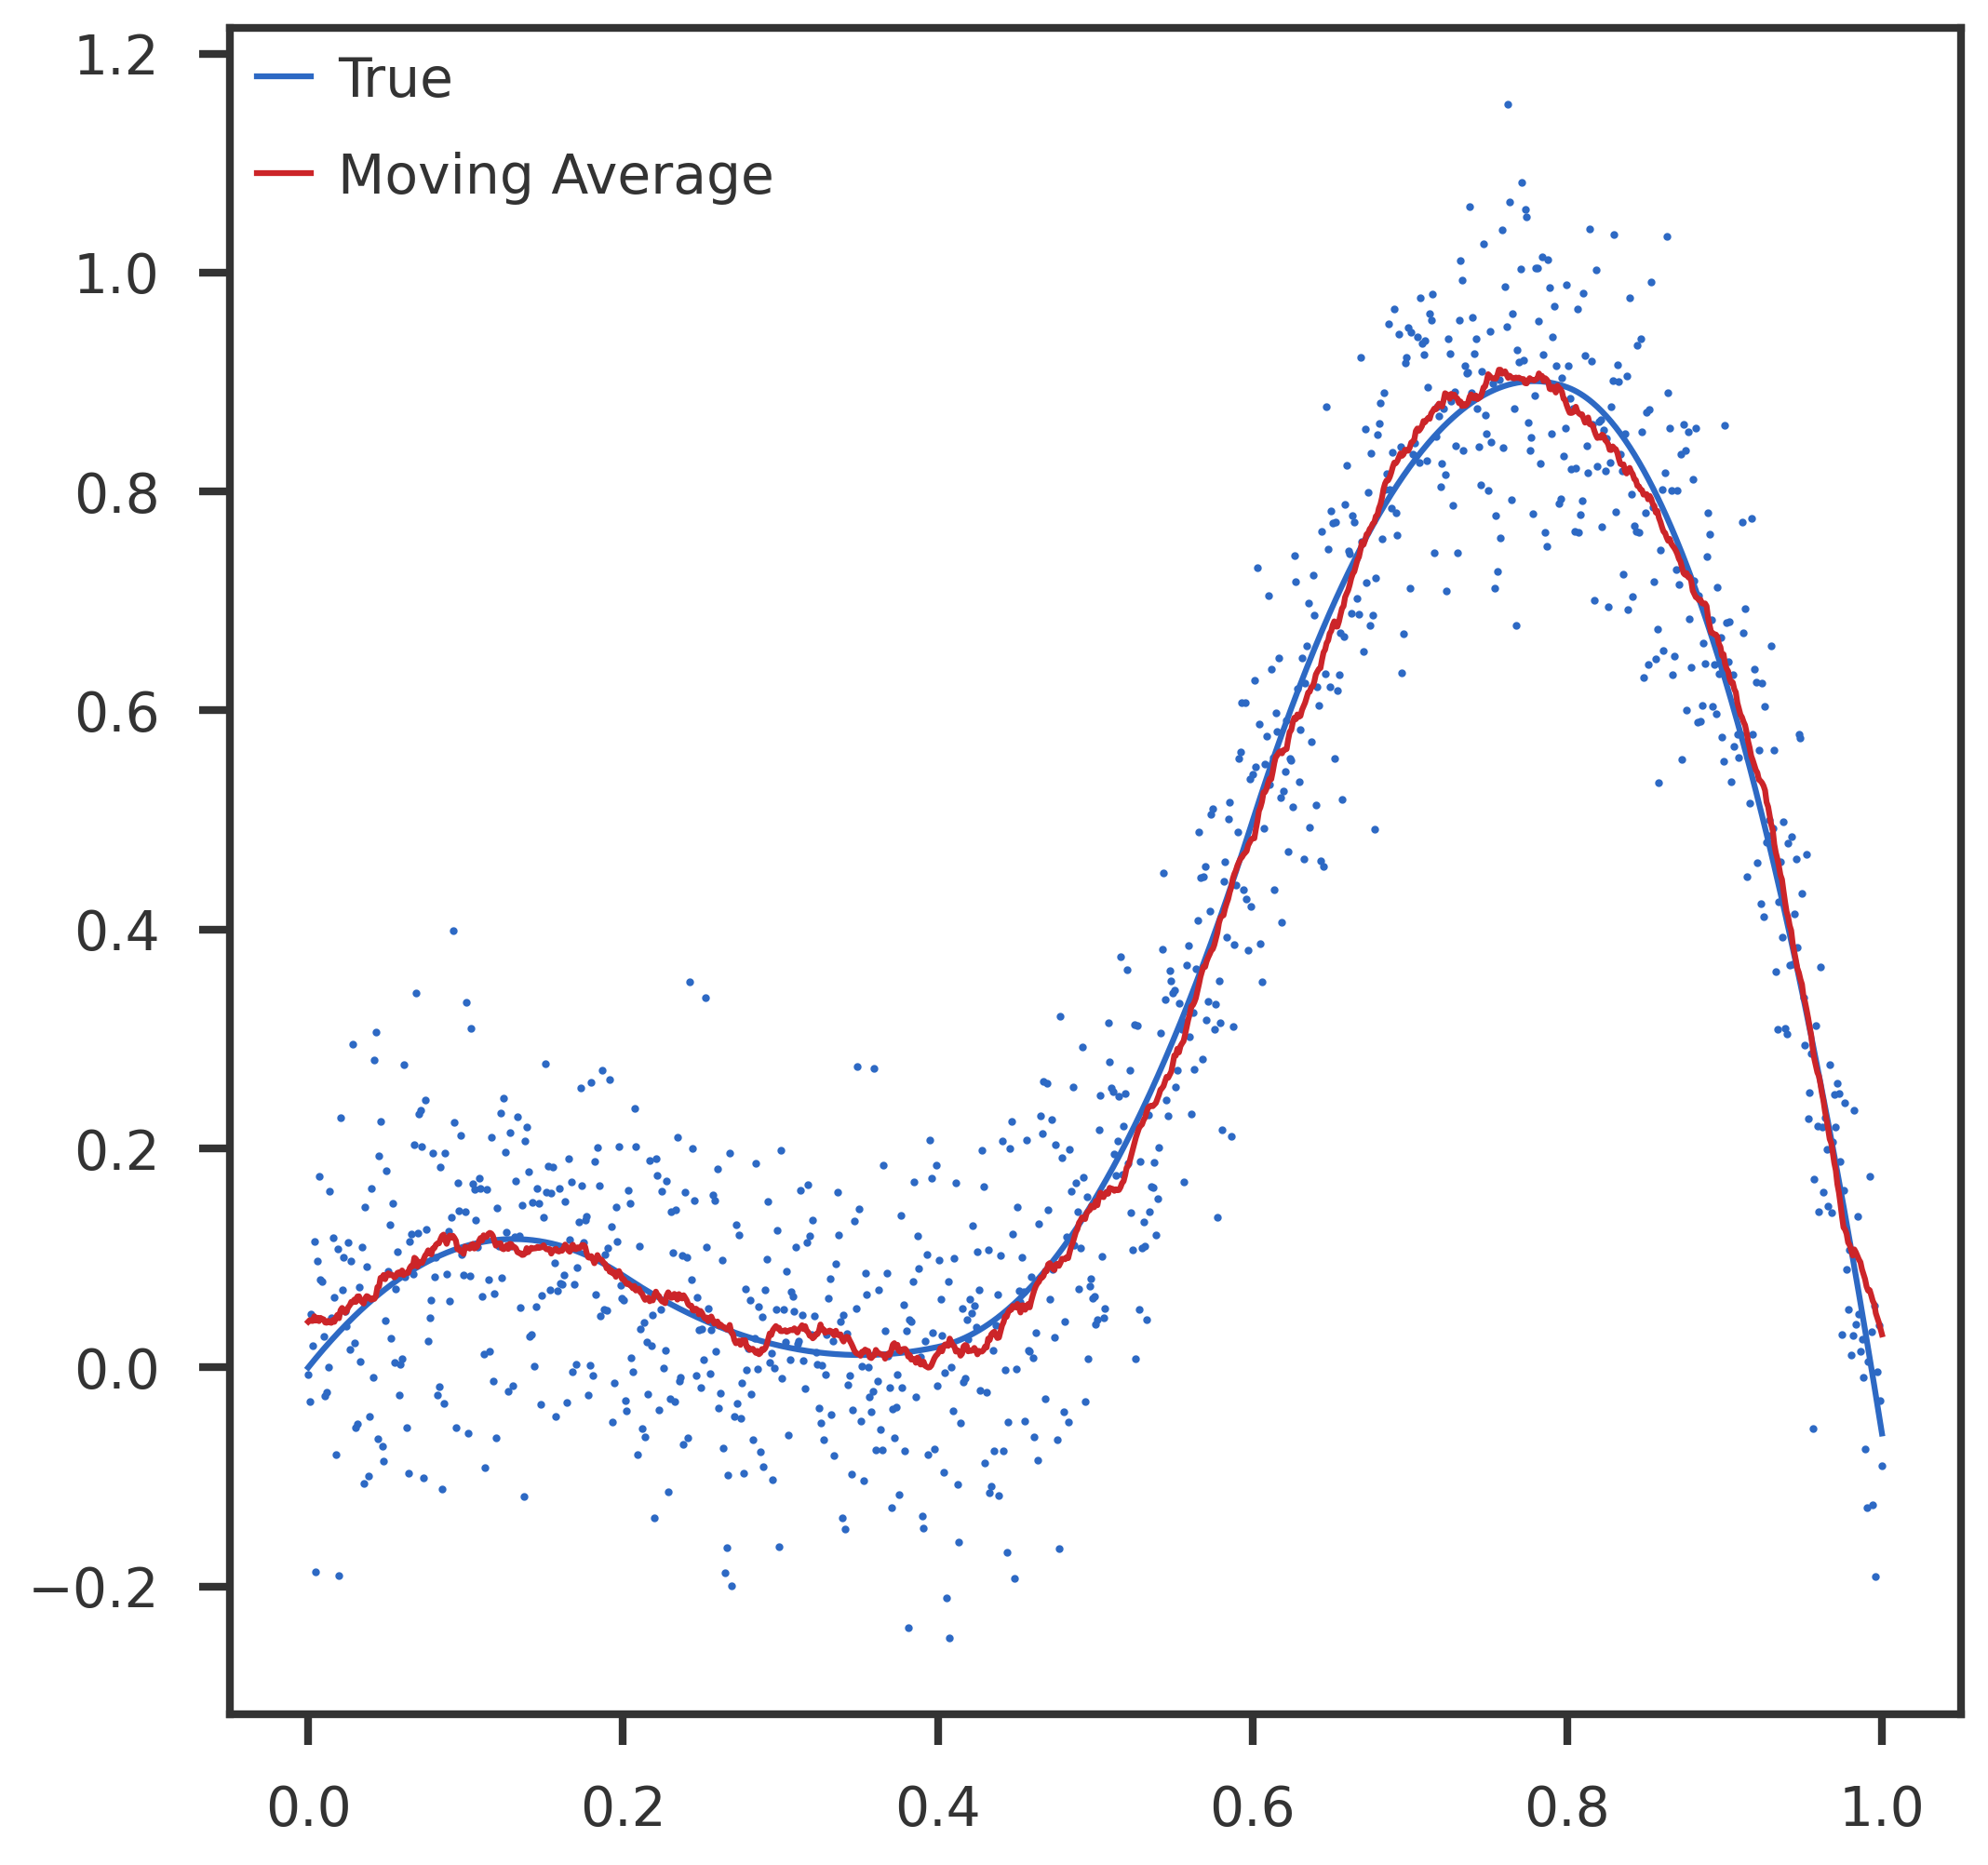

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

xvals = np.linspace(0, 1, y.shape[0])
ax1.scatter(xvals, y, s = 1)
ax1.plot(xvals, ytrue, label = "True")
ax1.plot(xvals, y0, label = "Moving Average")
ax1.legend()
plt.show()

In [7]:
gv0 = LinearRegression(optimize_s = False, maxiter = 1000, obj = 'direct', tol = 1e-7)
gv0.fit(X, y, prior_init, b_init = binit, s2_init = s2init)

print(f"Iterations: {gv0.niter}")
print(gv0.fitobj.message)
print(f"Intercept: {gv0.intercept}")

Iterations: 1000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Intercept: 0.3285979903116351


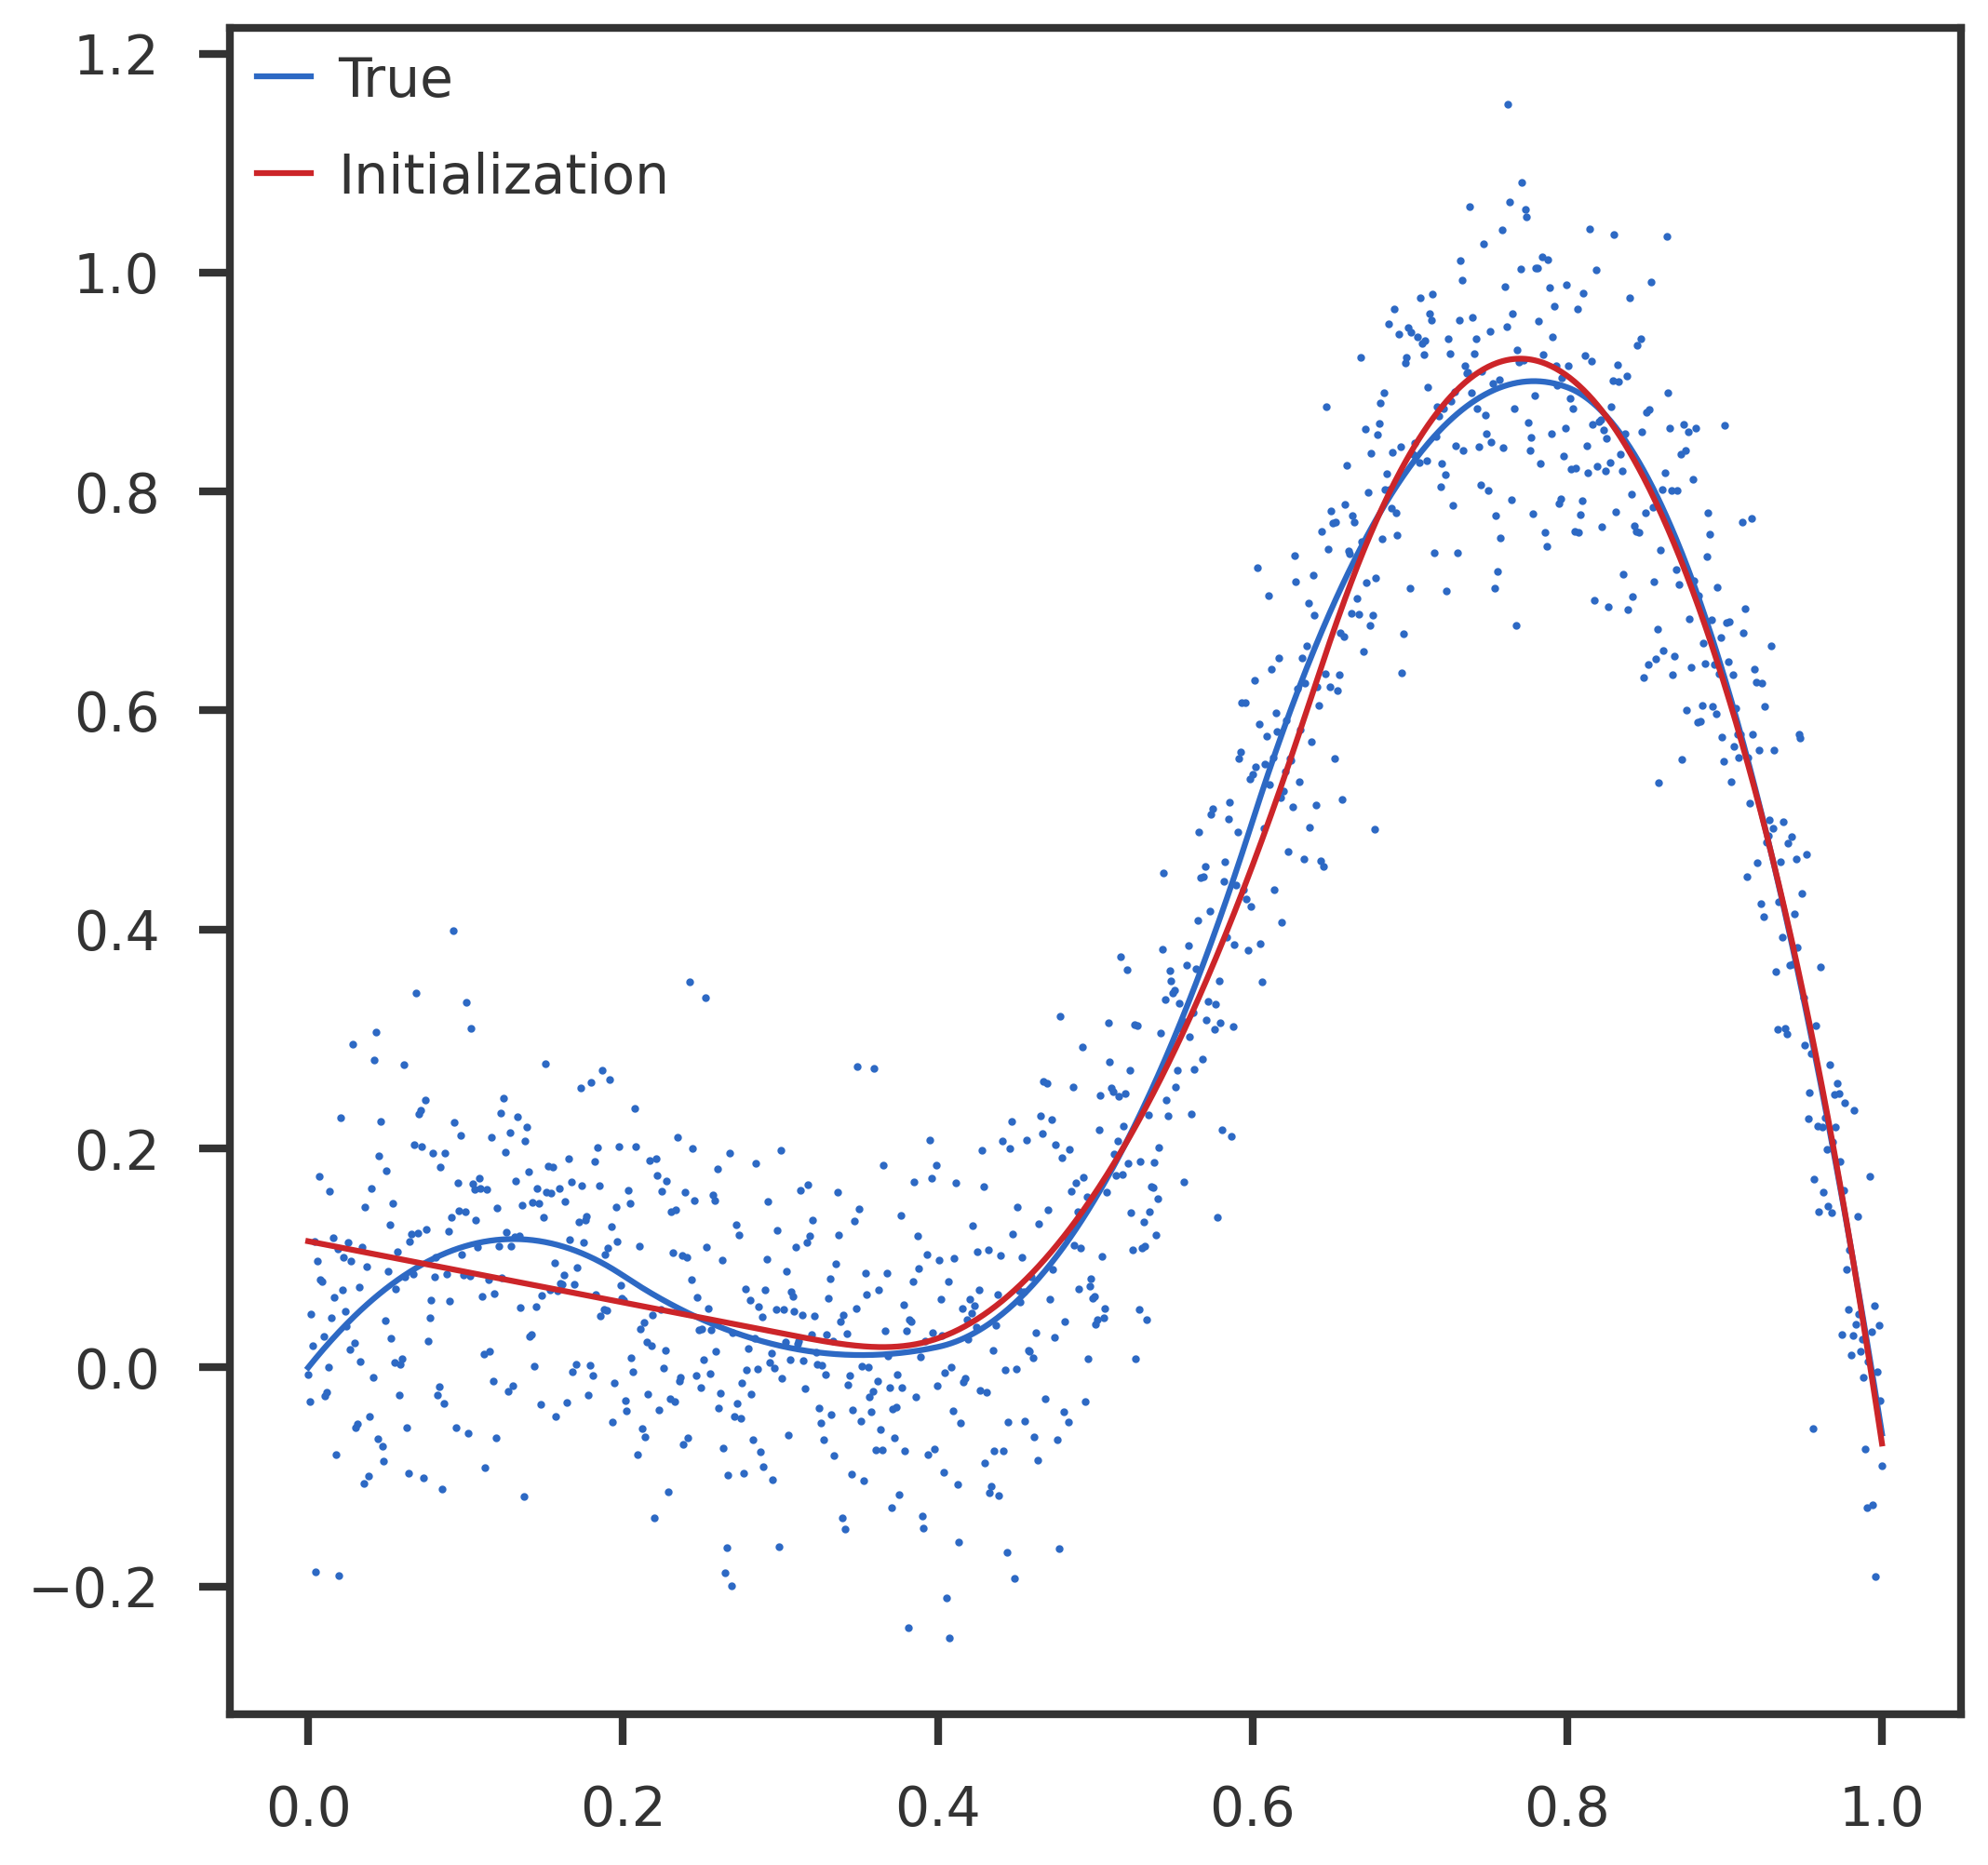

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
xvals = np.linspace(0, 1, y.shape[0])
ax1.scatter(xvals, y, s = 1)
ax1.plot(xvals, ytrue, label = "True")
ax1.plot(xvals, np.dot(X, gv0.coef) + gv0.intercept, label = "Initialization")
ax1.legend()
plt.show()

In [13]:
prior = toy_priors.get_ash_scaled(k = 20, sparsity = 0, skbase = (degree + 1) * 20.0)
gv = LinearRegression(obj = 'direct')
gv.fit(X, y, prior, b_init = gv0.coef, s2_init = gv0.residual_var)


print(f"Iterations: {gv.niter}")
print(gv.fitobj.message)
print(f"Intercept: {gv.intercept}")

Iterations: 820
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Intercept: 0.3285979903116351


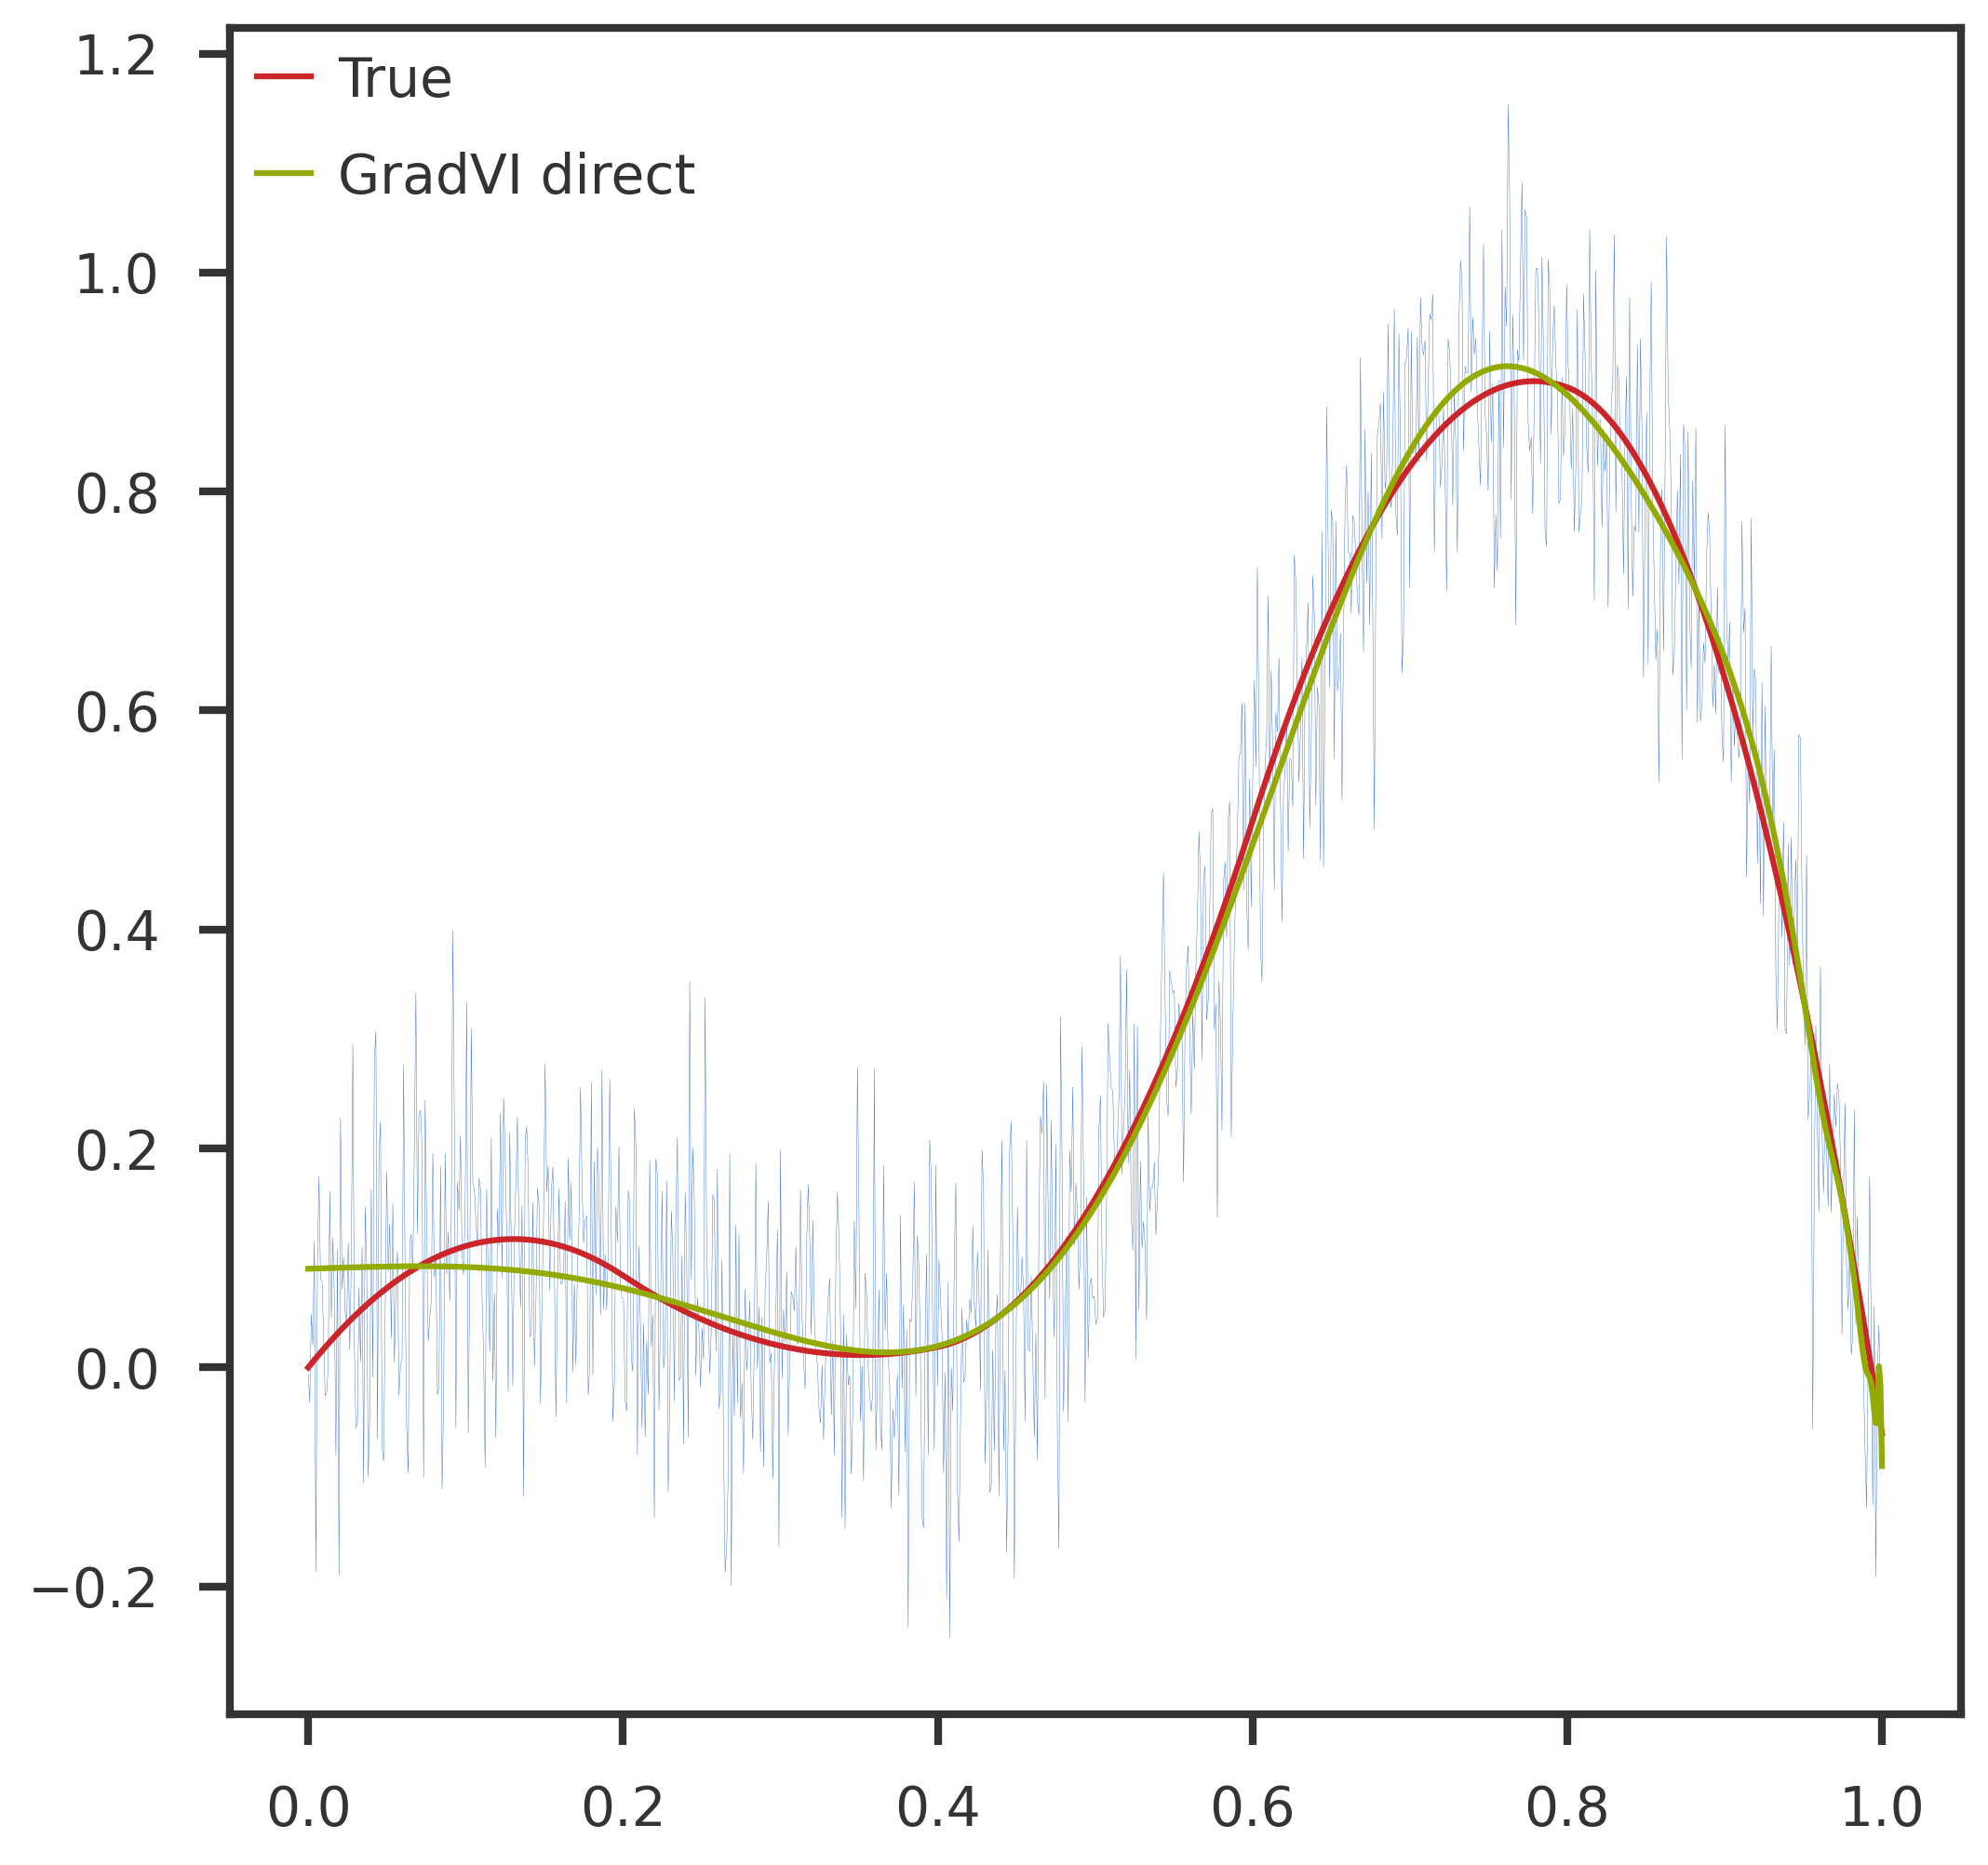

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
xvals = np.linspace(0, 1, y.shape[0])
#ax1.scatter(xvals, y, s = 1)
ax1.plot(xvals, y, lw = 0.1)
ax1.plot(xvals, ytrue, label = "True")
ax1.plot(xvals, np.dot(X, gv.coef) + gv0.intercept, label = "GradVI direct")
ax1.legend()
plt.show()